***О работе***


---
**Назване:** Лабораторная работа № 3.

**Автор:** Мусатов Максим

**Проверил:** Новиков И. А.

**Номер варианта:** 7

**Цель работы:** Получение навыков работы с методами регрессии

In [35]:
import pandas as pd
import numpy as np

df = pd.read_csv('kc_house_data.csv', delimiter=";")

In [ ]:
print("Доступные столбцы в DataFrame:")
print(df.columns.tolist())

Доступные столбцы в DataFrame:
['id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15']


In [ ]:
df.shape[0]

21613

**Задание 1.** Изучить набор данных

Этот набор данных содержит цены на продажу домов в округе Кинг, включая Сиэтл. В него включены дома, проданные в период с мая 2014 по май 2015 года.

**id** - Уникальный идентификатор для каждого проданного дома

**date** - Дата продажи дома

**price** - Цена каждого проданного дома

**bedrooms** - Количество спален

**bathroom** - Количество ванных комнат, где .5 приходится на комнату с туалетом, но без душа

**sqft_living** -Площадь внутреннего жилого пространства квартиры

**sqft_lot** - Площадь земельного участка в квадратных метрах

**floors** - Количество этажей

**waterfront** - Фиктивная переменная, определяющая, выходила ли квартира окнами на набережную или нет

**view** - Показатель от 0 до 4, показывающий, насколько хорошим был вид на объект недвижимости

**condition** - Оценка состояния квартиры от 1 до 5 баллов

**grade** - Индекс от 1 до 13, где 1-3 не соответствует уровню строительства и проектирования зданий, 7 - средний уровень строительства и проектирования, а 11-13 - высокий уровень качества строительства и проектирования.

**sqft_above** - Квадратный метр внутреннего жилого пространства, расположенного над уровнем земли

**sqft_basement** - Квадратный метр внутреннего жилого пространства, находящегося ниже уровня земли

**yr_built** - В том году, когда дом был впервые построен

**yr_renovated** - Год последней реконструкции дома

**zipcode** - В каком районе с почтовым индексом находится дом

**lat** - Решетчатость

**long** - Долгота

**sqft_living15** - Квадратный метр внутренней жилой площади для 15 ближайших соседей

**sqft_lot15** - Площадь земельных участков ближайших 15 соседей




**Задание 2.** Проанализировать колонки в наборе данных

Целевая переменная — **price.**

Модель должна предсказывать стоимость дома на основе остальных признаков.

**Задание 3.** Удалить дубликаты строк в наборе данных

In [ ]:
df_no_dublicates = df.drop_duplicates()

print(f"До: {df.shape[0]}\nПосле: {df_no_dublicates.shape[0]}")

До: 21613
После: 21613


**Задание 4.** Удалите выбросы из числовых данных

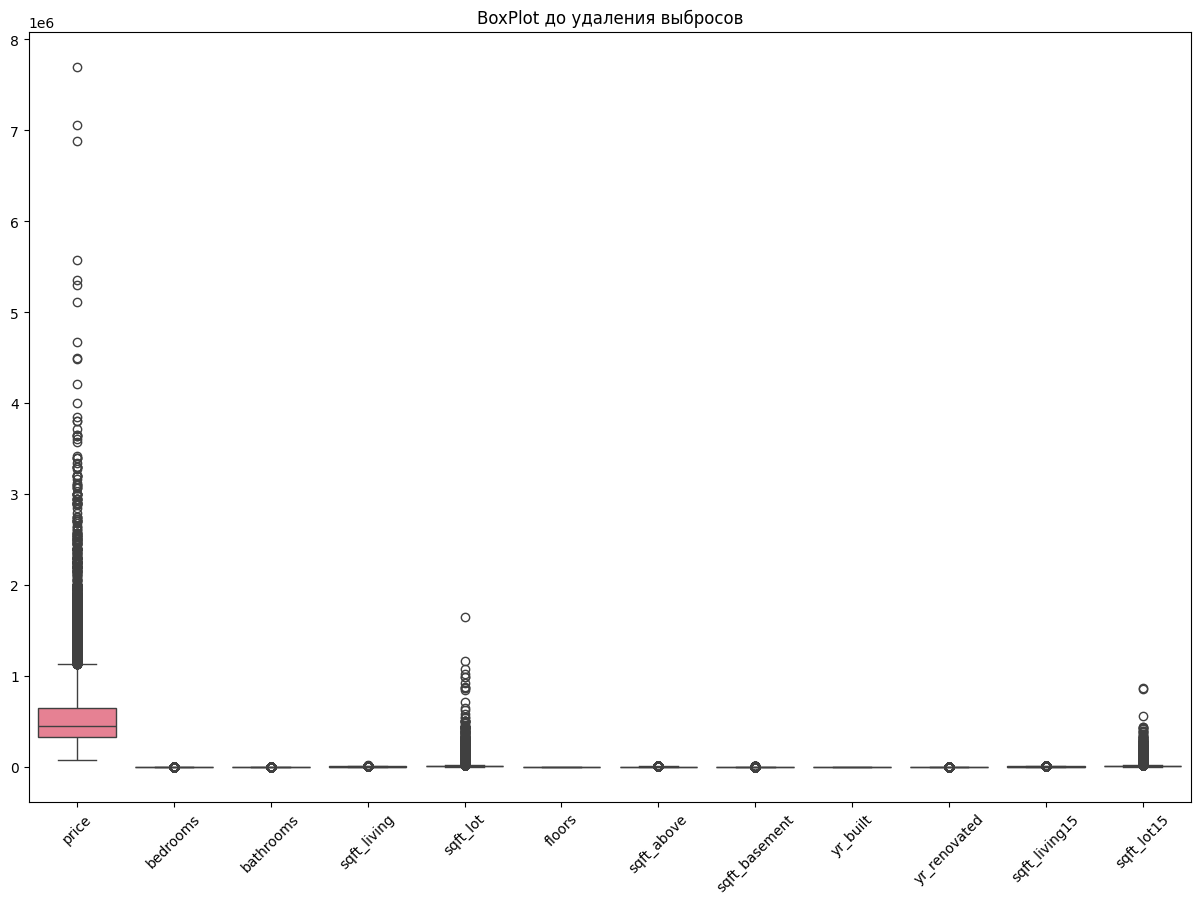

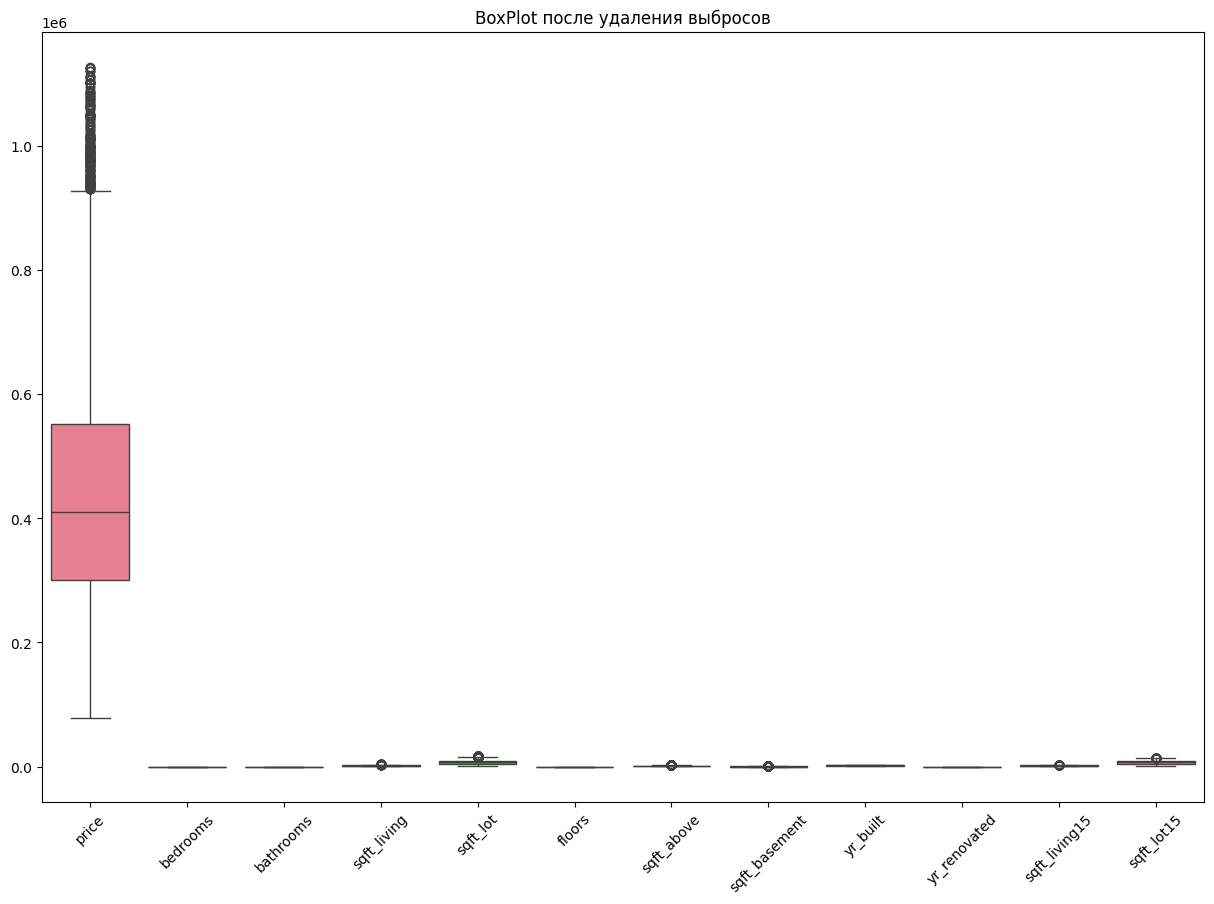

Размер до удаления выбросов: (21613, 21)
Размер после удаления выбросов: (15691, 21)
Удалено строк: 5922


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')

# Выбор числовых колонок для анализа
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                'sqft_living15', 'sqft_lot15']

# BoxPlot до удаления выбросов
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.title('BoxPlot до удаления выбросов')
plt.xticks(rotation=45)
plt.show()

# Функция для удаления выбросов по 1.5*IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df_clean = remove_outliers(df, numeric_cols)

# BoxPlot после удаления выбросов
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_clean[numeric_cols])
plt.title('BoxPlot после удаления выбросов')
plt.xticks(rotation=45)
plt.show()

print(f"Размер до удаления выбросов: {df.shape}")
print(f"Размер после удаления выбросов: {df_clean.shape}")
print(f"Удалено строк: {len(df) - len(df_clean)}")



**Задание 5.** Оценить корреляцию между числовыми признаками

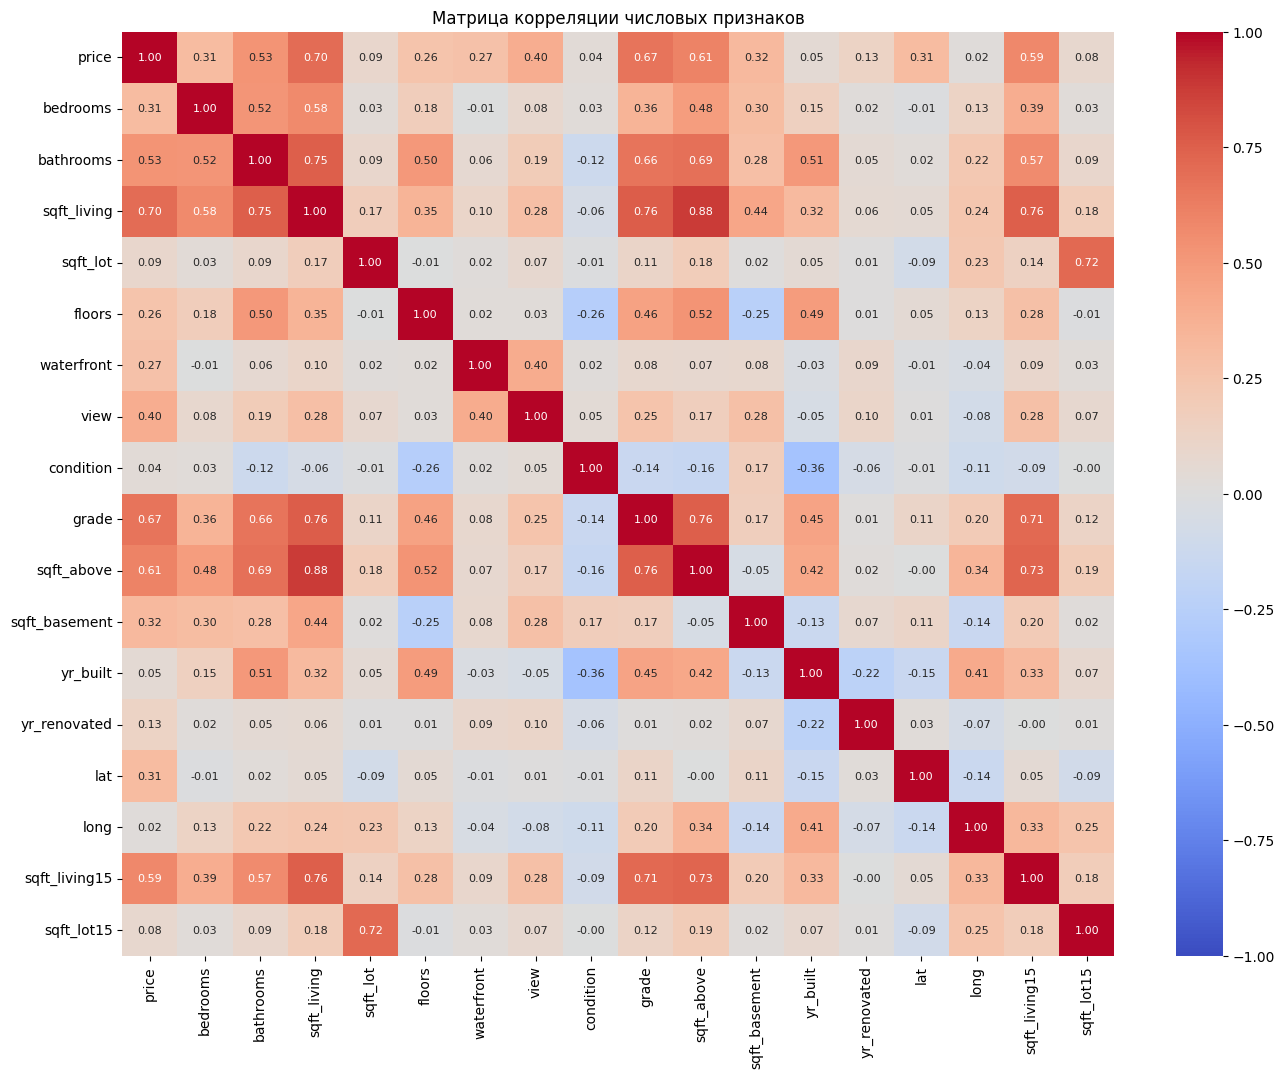


Признаки с наибольшим числом корреляций:
bathrooms: 8 сильных корреляций
sqft_living: 6 сильных корреляций
sqft_above: 6 сильных корреляций
grade: 5 сильных корреляций
sqft_living15: 5 сильных корреляций
bedrooms: 2 сильных корреляций
floors: 2 сильных корреляций
sqft_lot: 1 сильных корреляций
yr_built: 1 сильных корреляций
sqft_lot15: 1 сильных корреляций
waterfront: 0 сильных корреляций
view: 0 сильных корреляций
condition: 0 сильных корреляций
sqft_basement: 0 сильных корреляций
yr_renovated: 0 сильных корреляций
lat: 0 сильных корреляций
long: 0 сильных корреляций

Детальные корреляции для топ-признаков:

bathrooms (коррелирует с 8 признаками):
  - sqft_living: 0.75
  - sqft_above: 0.69
  - grade: 0.66
  - sqft_living15: 0.57
  - price: 0.53
  - bedrooms: 0.52
  - yr_built: 0.51
  - floors: 0.50

sqft_living (коррелирует с 6 признаками):
  - sqft_above: 0.88
  - grade: 0.76
  - sqft_living15: 0.76
  - bathrooms: 0.75
  - price: 0.70
  - bedrooms: 0.58

sqft_above (коррелирует с 6 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор числовых колонок (исключаем id, date, zipcode)
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
                'sqft_living15', 'sqft_lot15']

# Матрица корреляции
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={'size': 8}, vmin=-1, vmax=1)
plt.title('Матрица корреляции числовых признаков')
plt.show()

# Находим признаки с наибольшим числом корреляций > |0.5|
threshold = 0.5
high_corr_features = []

for column in corr_matrix.columns:
    if column != 'price':
        # Считаем количество корреляций
        corr_count = sum((abs(corr_matrix[column]) > threshold) &
                         (corr_matrix[column].index != column))
        high_corr_features.append((column, corr_count))

high_corr_features.sort(key=lambda x: x[1], reverse=True)

print("\nПризнаки с наибольшим числом корреляций:")
for feature, count in high_corr_features:
    print(f"{feature}: {count} сильных корреляций")

# Выводим сами коррелирующие пары для топ-признаков
print("\nДетальные корреляции для топ-признаков:")
for feature, count in high_corr_features[:5]:
    print(f"\n{feature} (коррелирует с {count} признаками):")
    correlated_features = corr_matrix[feature][
        (abs(corr_matrix[feature]) > threshold) &
        (corr_matrix[feature].index != feature)
    ].sort_values(ascending=False)

    for correlated_feature, value in correlated_features.items():
        print(f"  - {correlated_feature}: {value:.2f}")

**Задание 6.** Проанализировать колонки на наличие нулевых значений

In [ ]:
print("Количество нулевых значений:")
df.isnull().sum()

Количество нулевых значений:


,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


В данных отсутствуют нулевые значения

**Задание 7**.	Проанализировать почему в той или иной колонке могут присутствовать нулевые значения.

**view, condition, grade:**

Нули могут быть минимальной оценкой (если шкала допускает)

Чаще указывают на пропущенные данные

**waterfront:**

0 = нет выхода к воде

**yr_renovated:**

0 = никогда не ремонтировался (важное информативное значение)


**Задание 9.** Выполнить масштабирование количественных (числовых) признаков


1. Постройте диаграммы BoxPlot




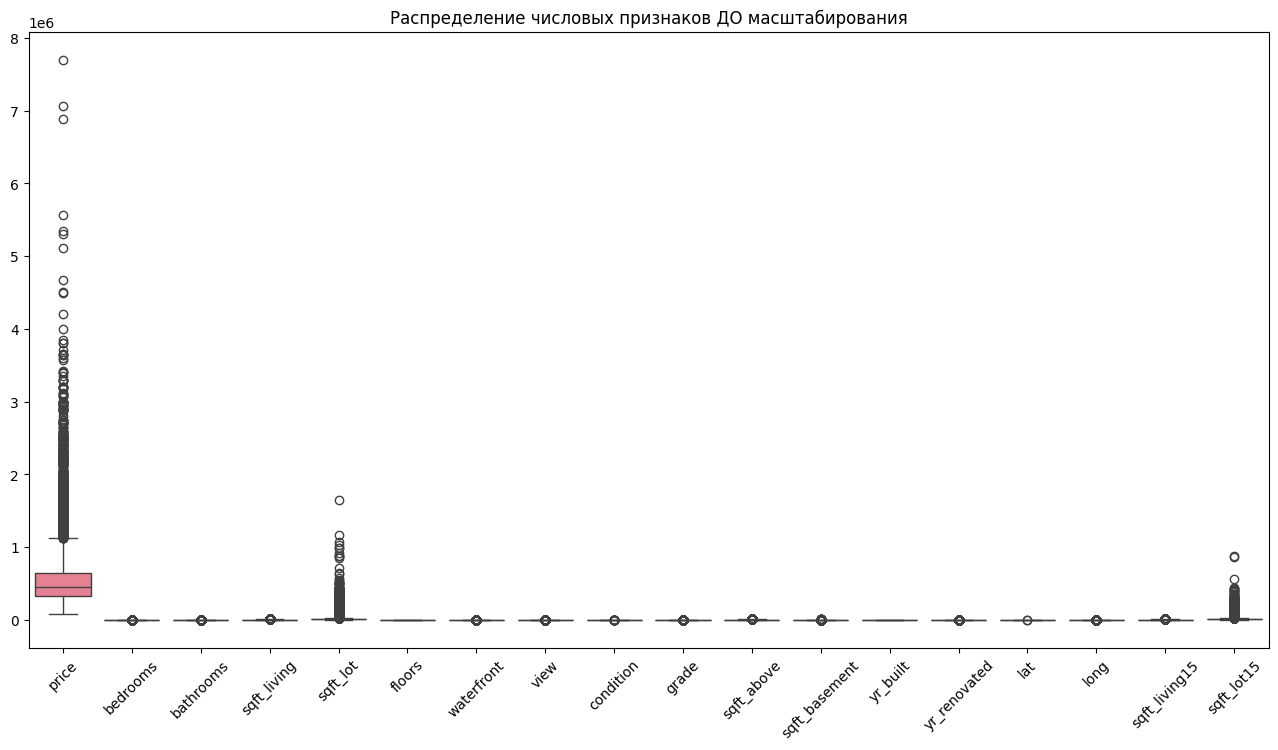

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pd.read_csv('kc_house_data.csv')

# Выделяем числовые колонки (исключаем id, дату и категориальные)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop(['id', 'zipcode'])  # Исключаем нечисловые по смыслу

plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Распределение числовых признаков ДО масштабирования')
plt.xticks(rotation=45)
plt.show()

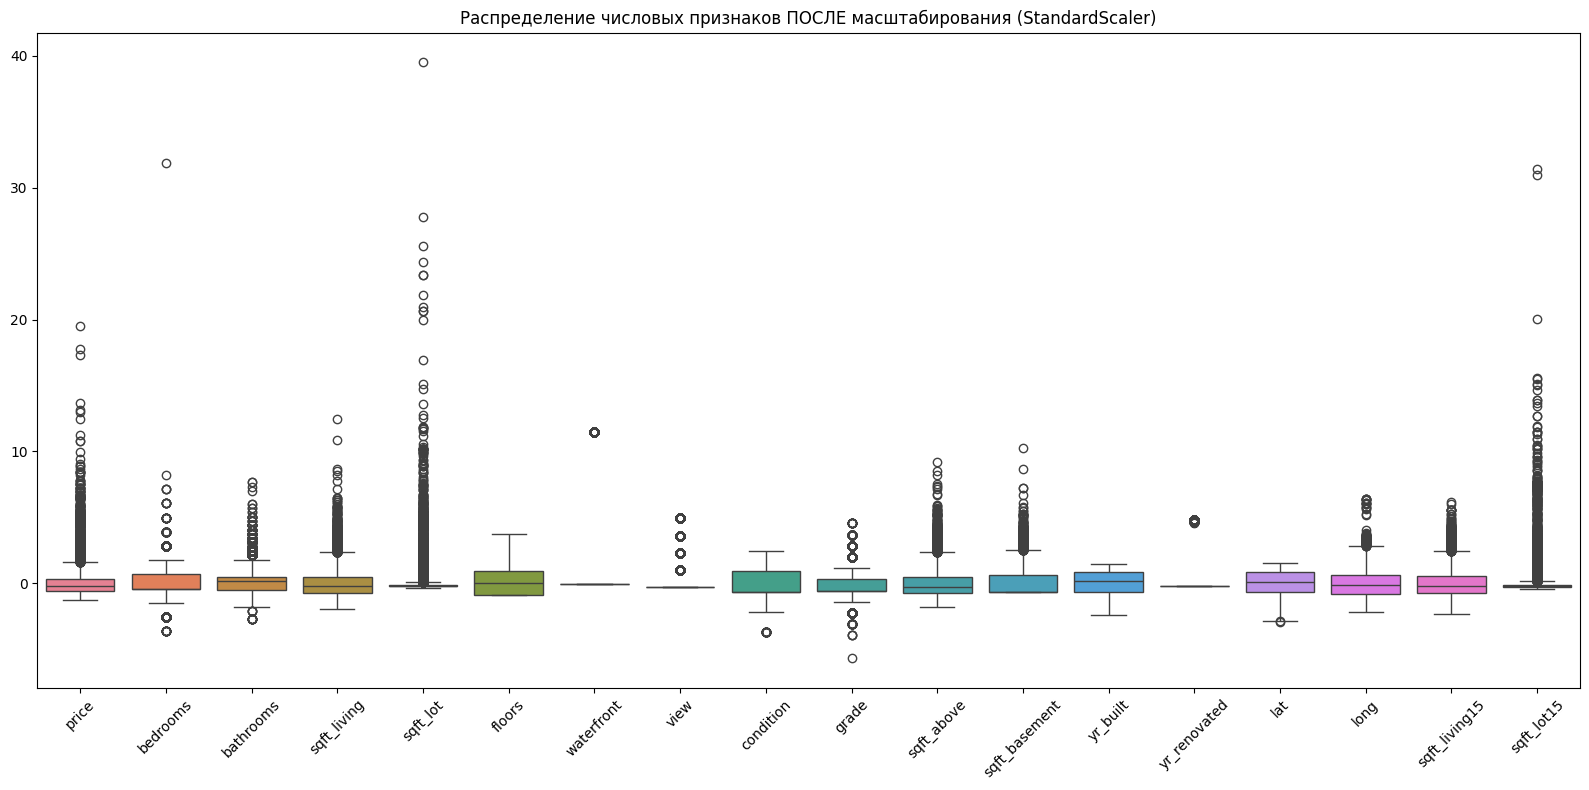

In [10]:
#Применяем StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols)

# Построение BoxPlot после масштабирования
plt.figure(figsize=(16, 8))
sns.boxplot(data=scaled_df)
plt.title('Распределение числовых признаков ПОСЛЕ масштабирования (StandardScaler)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Задание 10.** Выполнить замену категориальных признаков

In [37]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')

zipcode_encoded = ohe.fit_transform(df[['zipcode']]).toarray()

zipcode_columns = ohe.get_feature_names_out(['zipcode'])

# Создаём DataFrame с one-hot закодированными данными
zipcode_df = pd.DataFrame(zipcode_encoded, columns=zipcode_columns)

# Объединяем с остальными данными (удалив исходный zipcode)
df_encoded = pd.concat([df.drop('zipcode', axis=1).reset_index(drop=True),
                        zipcode_df.reset_index(drop=True)], axis=1)

df_encoded.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 11.** Решить поставленную задачу регрессии

In [28]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

ridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.333e+14, tolerance: 1.728e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e+14, tolerance: 1.795e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.499e+14, tolerance: 1.807e

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_lasso = grid_search_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

y_pred_ridge = grid_search_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f'LASSO MAE: {mae_lasso}, MSE: {mse_lasso}')
print(f'RIDGE MAE: {mae_ridge}, MSE: {mse_ridge}')


LASSO MAE: 127493.33768801598, MSE: 45173051060.944824
RIDGE MAE: 127492.72947127014, MSE: 45174227749.87545


In [38]:
from scipy.stats import pearsonr, spearmanr

pearson_corr_lasso, p_value_pearson_lasso = pearsonr(y_test, y_pred_lasso)
spearman_corr_lasso, p_value_spearman_lasso = spearmanr(y_test, y_pred_lasso)

pearson_corr_ridge, p_value_pearson_ridge = pearsonr(y_test, y_pred_ridge)
spearman_corr_ridge, p_value_spearman_ridge = spearmanr(y_test, y_pred_ridge)

print(f'LASSO Пирсон: {pearson_corr_lasso}, p-value: {p_value_pearson_lasso}')
print(f'LASSO Спирман: {spearman_corr_lasso}, p-value: {p_value_spearman_lasso}')

print(f'RIDGE Пирсон: {pearson_corr_ridge}, p-value: {p_value_pearson_ridge}')
print(f'RIDGE Спирман {spearman_corr_ridge}, p-value: {p_value_spearman_ridge}')


LASSO Пирсон: 0.8376720977554826, p-value: 0.0
LASSO Спирман: 0.8599579220566815, p-value: 0.0
RIDGE Пирсон: 0.8376684433830626, p-value: 0.0
RIDGE Спирман 0.8599496269154141, p-value: 0.0
